# 矩形网格背景分类图（pcolormesh）
- 使用非规则矩形网格创建伪颜色图；
- 网格化的颜色图，可以通对背景的定义，可以直观的表现出分类边界；
## 决策树分类样例

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [5]:
# 使用经典的鸢尾花数据
inputdata = datasets.load_iris()
# 获取变量名称
iris_feature = ['花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度']
target_name = inputdata.target_names.tolist()
# 取花萼长度和花瓣长度做为特征，训练决策树模型
x_train, x_test, y_train, y_test = train_test_split(inputdata.data[:,[0,2]], inputdata.target, test_size = 0.2, random_state=0)
# 拟合模型
model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)

In [11]:
# 随机采样, 生成花萼长度和花瓣长度数据
# 蒙特卡洛思想, 随机模拟大量不同长度下的分类结果, 并作为分类背景
N, M = 500, 500  # 横纵各采样500个值，共250000个数据
# 在已有数据大小范围内生成数据
x1_min, x2_min = x_train.min(axis=0)
x1_max, x2_max = x_train.max(axis=0)
# 根据变量范围, 生成坐标轴
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 转换成下x,y坐标形式，生成网格采样点
x_show = np.stack((x1.flatten(), x2.flatten()), axis=1)  # x,y坐标位置分别对应输入两个变量
# 使用拟合模型验证,生成250000个数据的分类结果
y_predict = model.predict(x_show)

In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 设置使中文正常显示
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

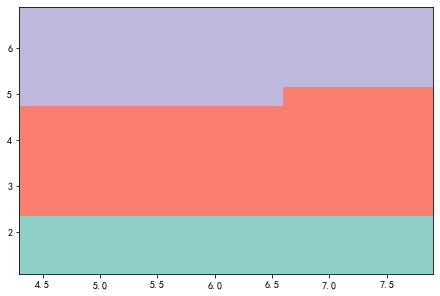

In [44]:
fig, ax = plt.subplots(figsize=(6, 4),constrained_layout=True)
# 设定颜色colormap
cm_light = mpl.colors.ListedColormap(['#8ECFC9', '#FA7F6F', '#BEB8DC'])  # 背景图
cm_dark = mpl.colors.ListedColormap(['green', 'red', 'purple'])  # 散点图
# 绘制低饱和度色彩分类背景
ax.pcolormesh(x1, x2, y_predict.reshape(x1.shape), cmap=cm_light)

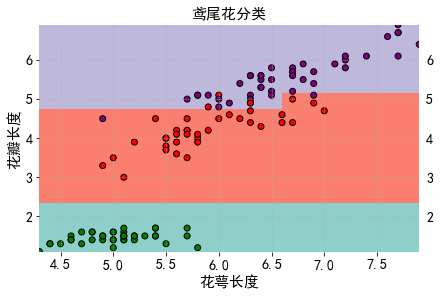

In [45]:
fig, ax = plt.subplots(figsize=(6, 4),constrained_layout=True)
# 设定颜色colormap
cm_light = mpl.colors.ListedColormap(['#8ECFC9', '#FA7F6F', '#BEB8DC'])  # 背景图
cm_dark = mpl.colors.ListedColormap(['green', 'red', 'purple'])  # 散点图
# 绘制低饱和度色彩分类背景
ax.pcolormesh(x1, x2, y_predict.reshape(x1.shape), cmap=cm_light)
# 更改坐标范围
ax.set_xlim(x1_min, x1_max)
ax.set_ylim(x2_min, x2_max)
# 绘制散点图
# 设置参数c：设定一组变量用来对应cmap颜色；y_train为分类结果
ax.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_dark,marker='o',edgecolors='k')
# 去除坐标轴边线
ax.spines[['top','bottom','left','right']].set_visible(False)
# 增加坐标轴右侧刻度，并设置粗细
ax.tick_params(labelright = True,labelsize=14)
# 设置x轴标签
ax.set_xlabel('花萼长度',fontsize=15)
ax.set_ylabel('花瓣长度',fontsize=15)
ax.set_title('鸢尾花分类',fontsize=15)
plt.grid(visible=True,axis='both',ls=':')
plt.savefig('C:\Git Code\ScienceGallery\Picture\Grid_background.png')